In [ ]:
!pip install swifter
!pip install -q kaggle

In [ ]:
from google.colab import files 

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedahmedae","key":"d3b2e9fe86111452733adaf8eee2e0f6"}'}

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14165  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8514  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3808  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1648  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 99% 560M/565M [00:08<00:00, 51.3MB/s]
100% 565M/565M [00:08<00:00, 70.6MB/s]


In [ ]:
#!unzip "/content/fashion-product-images-small.zip" -d "/content/drive/MyDrive/Dataset"

import zipfile

zip_ref = zipfile.ZipFile("/content/fashion-product-images-small.zip", 'r')
#zip_ref.extractall("/content/drive/MyDrive/Dataset/Arabic Handwritten Characters")
#zip_ref.close()

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/5813.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58131.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58132.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58133.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58135.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58136.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58137.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58138.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/58139.jpg  
  inflating: /content/drive/MyDrive/Dataset/FashionDataset/myntradataset/images/5814.jpg  
  inflating: /content/drive/MyD

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd 
import os 

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Dataset/FashionDataset/"
print(os.listdir(DATASET_PATH))

['styles.csv', 'images', 'myntradataset']


In [ ]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [ ]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img):
    return cv2.imread(img_path(img))

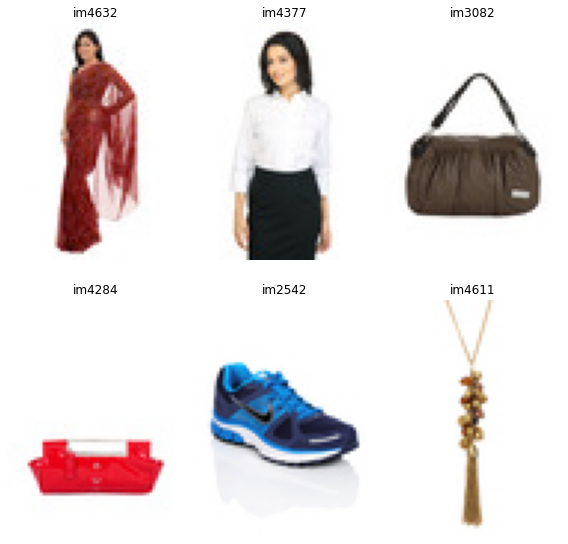

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}

plot_figures(figures, 2, 3)

In [ ]:
len(np.unique(df["articleType"]))

108

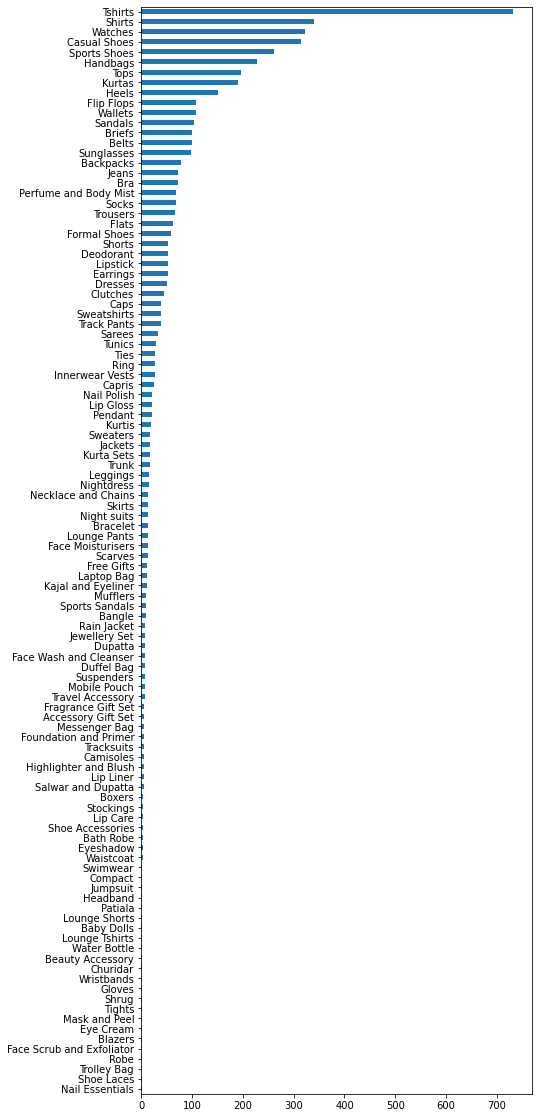

In [ ]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D

In [ ]:
img_width, img_height, _ = load_image(df.iloc[0].image).shape

print(img_width, img_height)

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

80 60
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 2, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from keras.models import load_model, save_model

MODEL_FILE_PATH = 'F_resnet50_model.h5'
save_model(model, MODEL_FILE_PATH)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model = load_model(MODEL_FILE_PATH)

In [ ]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [ ]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape

(2048,)

[1.8793371  1.600883   0.09202942 ... 3.2688982  2.2717323  5.4333844 ]


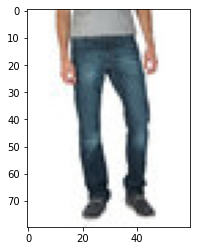

In [ ]:
plt.imshow(cv2.cvtColor(load_image(df.iloc[1].image), cv2.COLOR_BGR2RGB))
print(emb)

In [ ]:
%%time
import swifter

map_embeddings = df['image'].swifter.apply(lambda img: get_embedding(model, img))
df_embs = map_embeddings.apply(pd.Series)

print(df_embs.shape)

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

(5000, 2048)
CPU times: user 9min 25s, sys: 23.1 s, total: 9min 48s
Wall time: 27min


In [ ]:
df_embs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,3.539251,0.000000,1.094596,0.000000,0.000000,4.458532,2.446016,2.678129,0.0,3.914631,1.422393,1.157283,0.000000,1.880764,0.0,0.0,3.269925,0.000000,11.893178,0.000000,1.452368,0.000000,0.0,0.000000,0.000000,0.000000,2.073373,0.0,0.000000,0.0,5.080476,1.391906,12.459064,2.493238,0.399840,0.0,0.731082,0.258778,1.375271,...,3.075200,3.41948,0.000000,0.000000,1.286983,0.000000,0.00000,0.000000,0.000000,1.393044,0.000000,1.660433,0.000000,0.000000,0.497360,0.00000,2.110276,0.435468,9.724483,0.215351,0.0,4.708140,0.000000,0.0,0.000000,0.000000,0.873243,0.000000,0.191963,0.031801,0.424306,0.000000,0.000000,5.880401,0.000000,0.000000,6.428887,4.408068,0.950041,1.847196
1,1.879337,1.600883,0.092029,4.433076,0.000000,0.000000,3.030766,8.530593,5.498661,0.0,0.000000,7.017092,0.000000,1.364954,5.615795,0.0,0.0,0.000000,0.152287,10.503733,0.000000,2.551051,2.986596,0.0,0.000000,3.486579,0.000000,3.006349,0.0,0.784937,0.0,4.231045,2.262224,0.000000,0.000000,0.000000,0.0,9.121507,0.000000,8.852417,...,3.296726,0.00000,0.000000,0.669539,0.000000,0.000000,0.00000,0.000000,0.000000,2.039625,0.000000,0.675682,5.739604,0.000000,0.000000,0.03763,1.846460,5.292167,1.975237,6.109930,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.738020,0.000000,3.759240,2.808288,0.000000,3.923482,3.183098,0.000000,0.000000,4.244201,3.268898,2.271732,5.433384
2,0.000000,0.311195,0.000000,3.808685,0.437032,7.112497,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.183247,0.000000,0.0,0.0,2.236697,0.180064,0.000000,3.487832,0.000000,0.000000,0.0,0.722539,0.395576,2.738959,0.000000,0.0,0.000000,0.0,0.562794,1.565978,0.000000,2.126893,15.926027,0.0,0.000000,0.000000,4.554018,...,0.000000,0.00000,1.399163,1.579809,0.000000,0.000000,0.96009,0.000000,0.000000,16.655598,0.000000,1.602541,2.852790,0.221713,9.957947,0.00000,0.000000,0.857989,0.000000,1.269109,0.0,0.000000,0.612414,0.0,1.764397,0.213959,0.000000,2.256892,0.000000,5.460070,0.218204,7.861292,1.655935,0.000000,0.000000,0.000000,4.703019,0.000000,2.340575,0.000000
3,0.588019,9.894619,0.000000,6.295311,1.783726,1.913124,0.000000,13.309933,7.805776,0.0,0.000000,5.977784,0.000000,0.608627,4.007223,0.0,0.0,0.000000,4.598935,13.648184,0.000000,0.000000,14.810142,0.0,0.000000,6.652885,0.000000,4.646013,0.0,0.473860,0.0,3.364133,0.437096,3.326417,0.138498,0.000000,0.0,4.190766,0.000000,0.020679,...,5.066573,0.00000,0.000000,2.253833,0.000000,2.684992,0.00000,0.000000,0.000000,2.171809,9.113696,4.865502,21.463577,0.000000,0.111593,0.00000,2.444345,1.588732,6.070646,2.827567,0.0,7.723210,0.000000,0.0,0.871971,0.000000,0.000000,2.010664,0.000000,4.141375,22.434387,0.000000,0.000000,0.000000,2.565925,3.330481,0.594367,1.130457,3.084231,7.608922
4,0.000000,1.882977,0.000000,5.122101,0.000000,0.000000,2.950287,6.626857,1.606636,0.0,0.004746,3.475130,0.000000,0.000000,0.720383,0.0,0.0,4.533977,0.253924,7.577389,0.000000,7.151679,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.083778,5.430902,2.236609,0.000000,0.0,0.732410,0.000000,2.389460,...,7.387797,3.04741,0.000000,0.000000,0.898806,0.000000,0.00000,0.115986,0.583247,2.020007,3.349904,2.007031,0.000000,0.000000,0.000000,0.00000,0.628917,1.910987,6.206245,1.472732,0.0,10.508315,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.504942,0.000000,1.274126,3.484575,0.786349,0.000000,1.597857,2.515497,0.068352,0.000000


In [ ]:
df_embs.shape

(5000, 2048)

In [ ]:
SIMILARITY_MATRIX_FILE_PATH = "similarity_matrix.csv"
df_embs.to_csv(SIMILARITY_MATRIX_FILE_PATH)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999994 , 0.5813053 , 0.23863798, 0.49294078],
       [0.5813053 , 0.9999993 , 0.23951328, 0.72273487],
       [0.23863798, 0.23951328, 1.        , 0.22011638],
       [0.49294078, 0.72273487, 0.22011638, 1.        ]], dtype=float32)

In [ ]:
def get_recommender(cosine_sim, idx, df, top_n = 5):
    indices = pd.Series(range(len(df)), index=df.index)
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

idx_ref = 500

get_recommender(cosine_sim, idx_ref, df, top_n = 5)

(Int64Index([4704, 2458, 233, 142, 1496], dtype='int64'),
 [0.87130344, 0.8632471, 0.8612351, 0.8505268, 0.8363852])

In [ ]:
idx_rec, idx_sim = get_recommender(cosine_sim, idx_ref, df, top_n = 6)
df.iloc[idx_rec]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
4704,7909,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011,Casual,Proline Men Navy & Cream Striped Polo T-shirt,7909.jpg
2458,12766,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011,Casual,Spykar Men Stripe Navy Blue T-Shirts,12766.jpg
233,53766,Men,Apparel,Topwear,Tshirts,White,Summer,2012,Casual,Puma Men White and Navy Blue T-shirt,53766.jpg
142,17240,Men,Apparel,Topwear,Tshirts,Black,Fall,2011,Casual,U.S. Polo Assn. Men Stripes Black Polo Tshirt,17240.jpg
1496,33285,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012,Casual,Arrow Sport Men Striped Blue Polo T-shirt,33285.jpg
3662,53760,Men,Apparel,Topwear,Tshirts,Navy Blue,Summer,2012,Casual,Puma Men Navy Blue and White T-shirt,53760.jpg


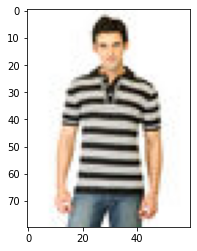

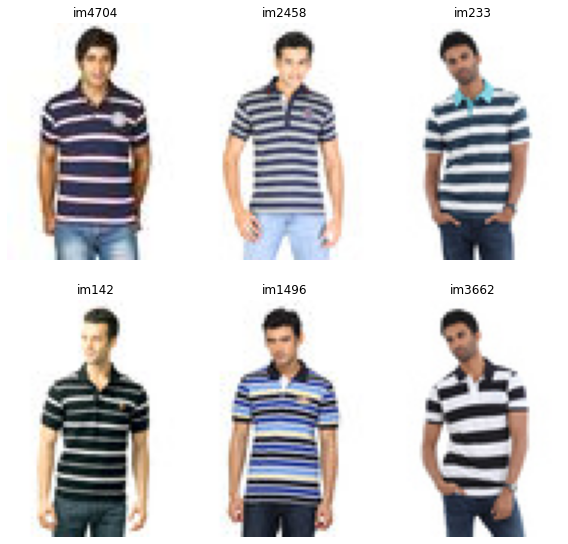

In [ ]:
# Recommendations
idx_rec, idx_sim = get_recommender(cosine_sim, idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

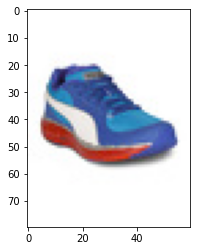

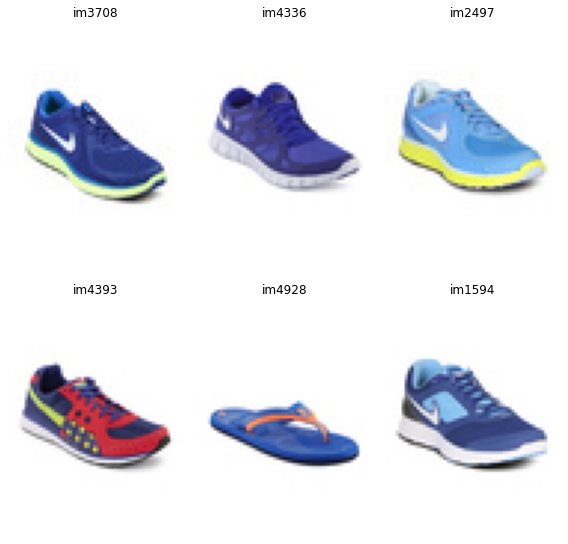

In [ ]:
idx_ref = 600

# Recommendations
idx_rec, idx_sim = get_recommender(cosine_sim, idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)


In [ ]:
product_similarity_df = df.iloc[idx_rec]
product_similarity_df["similarity_ratio"] = idx_sim
product_similarity_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,similarity_ratio
3708,3151,Men,Footwear,Shoes,Sports Shoes,Blue,Fall,2010,Sports,Nike Men's Lunarswift Blue Shoe,3151.jpg,0.827308
4336,24453,Men,Footwear,Shoes,Sports Shoes,Blue,Summer,2012,Sports,Nike Men Free Run Blue Sports Shoes,24453.jpg,0.825580
2497,6829,Women,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Nike Women's Lunar Swift White Blue Shoe,6829.jpg,0.824226
4393,26599,Men,Footwear,Shoes,Sports Shoes,Blue,Summer,2012,Sports,Puma Men Faas 300 Blue Sports Shoes,26599.jpg,0.811206
4928,24462,Men,Footwear,Flip Flops,Flip Flops,Blue,Fall,2011,Casual,ADIDAS Men Blue Adi Cliff Flip Flop,24462.jpg,0.805573


In [ ]:
filter_columns = ["similarity_ratio"]
filter_columns.append("gender")
filter_columns.append("masterCategory")
filter_columns.append("subCategory")
filter_columns.append("articleType")
filter_columns.append("baseColour")
filter_columns.append("season")
filter_columns.append("year")
filter_columns.append("usage")

product_similarity_df = product_similarity_df[filter_columns]

In [ ]:
product = df.iloc[idx_ref]
product["similarity_ratio"] = 1
product = product[filter_columns]

product_similarity_df = product_similarity_df.append(product)
product_similarity_df.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Int64Index([3708, 4336, 2497, 4393, 4928, 1594, 600], dtype='int64')

In [ ]:
from sklearn.preprocessing import LabelEncoder

product_similarity_df = product_similarity_df.apply(LabelEncoder().fit_transform)

In [ ]:
cosine_sim = 1-pairwise_distances(product_similarity_df, metric='cosine')
print(cosine_sim)

[[1.         0.88724426 0.85042006 0.70920814 0.6681531  0.32732684
  0.9739642 ]
 [0.88724426 1.         0.91855865 0.94280904 0.8660254  0.35355339
  0.95636507]
 [0.85042006 0.91855865 1.         0.8660254  0.70710678 0.4330127
  0.89799913]
 [0.70920814 0.94280904 0.8660254  1.         0.81649658 0.5
  0.81150267]
 [0.6681531  0.8660254  0.70710678 0.81649658 1.         0.
  0.77302068]
 [0.32732684 0.35355339 0.4330127  0.5        0.         1.
  0.27050089]
 [0.9739642  0.95636507 0.89799913 0.81150267 0.77302068 0.27050089
  1.        ]]


In [ ]:
product_best_sim_idx, product_best_sim_val = get_recommender(cosine_sim, idx_ref, product_similarity_df, top_n = 5)

product_best_sim_idx, product_best_sim_val

(Int64Index([3708, 4336, 2497, 4393, 4928], dtype='int64'),
 [0.9739642045665762,
  0.9563650695950077,
  0.8979991308594848,
  0.8115026712006892,
  0.7730206825239258])

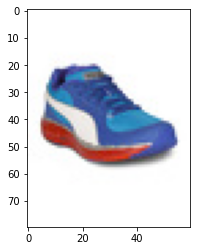

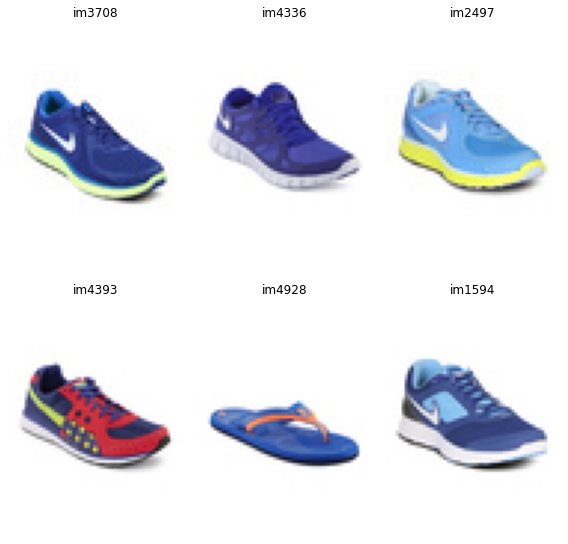

In [ ]:
# Recommendations
idx_rec, idx_sim = get_recommender(cosine_sim, idx_ref, product_similarity_df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)


In [ ]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 150.57835793495178 seconds


In [ ]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

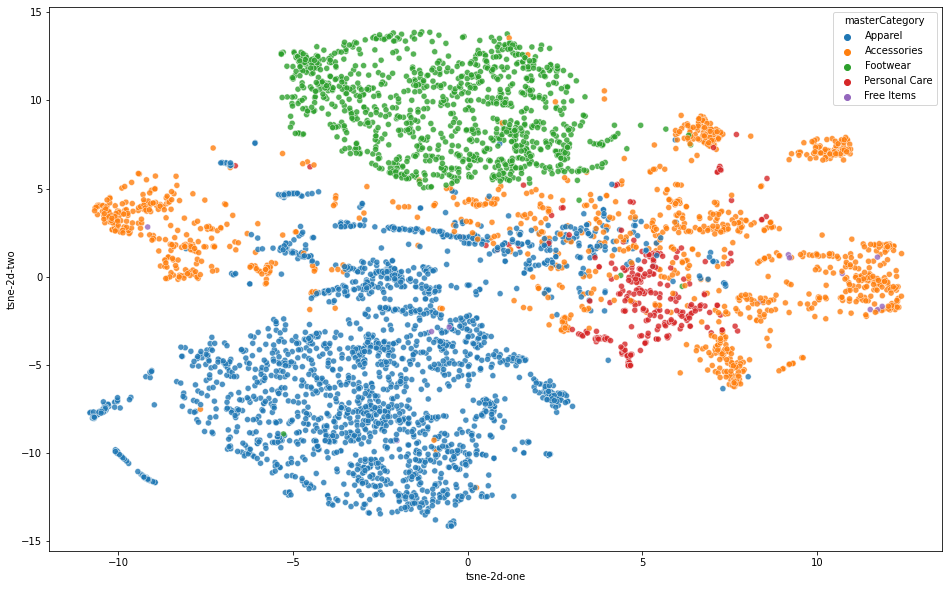

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="masterCategory",
                data=df,
                legend="full",
                alpha=0.8)

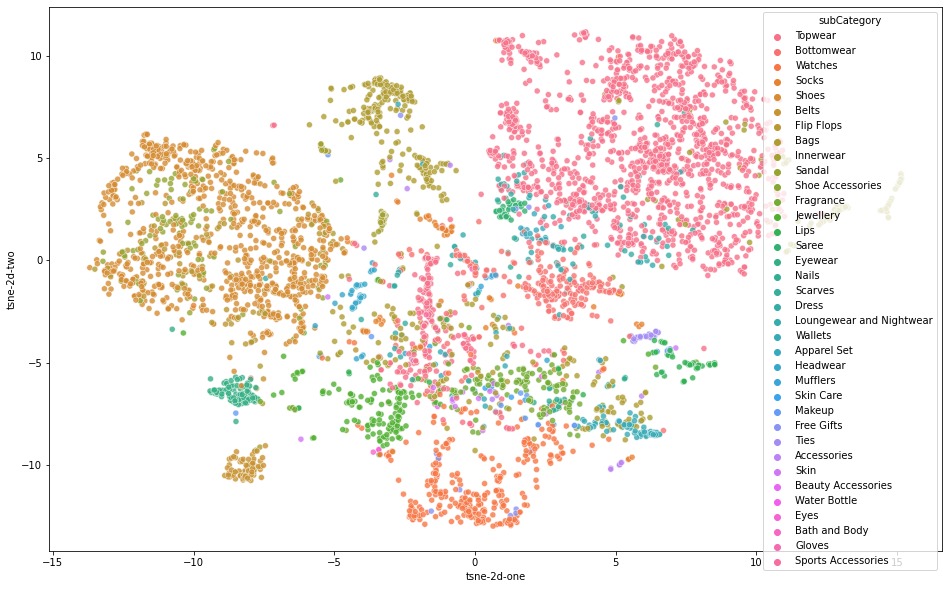

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="subCategory",
                data=df,
                legend="full",
                alpha=0.8)